<a href="https://colab.research.google.com/github/yasinsoylu1997/128-not-sampling/blob/main/hybr%C4%B1t_my_models_128.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import seaborn as sns
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers
import pandas as pd
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Activation,Concatenate
from tensorflow.keras.layers import BatchNormalization
from keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.metrics import classification_report,confusion_matrix
import keras
import keras.utils
from keras import utils as np_utils
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings
#!pip install visualkeras
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
import time

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import os
!pip install visualkeras



     |████████████████████████████████| 992 kB 4.2 MB/s 


In [3]:
labels = ['Lung_Opacity','COVID','Normal','Viral Pneumonia']

In [4]:
X = []
y = []
image_size = 128
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/tezz3/COVID-19_Radiography_Dataset_masked',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X.append(img)
        y.append(i)

        
X = np.array(X)
y = np.array(y)

100%|██████████| 1345/1345 [00:33<00:00, 39.72it/s] 


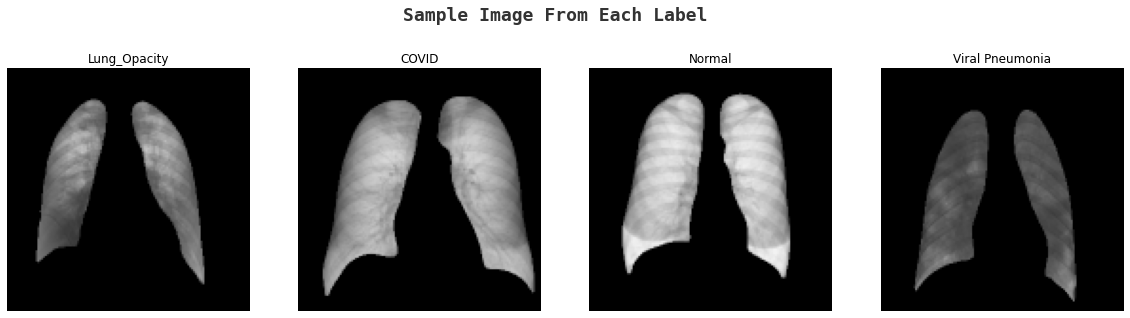

In [5]:
k=0
fig, ax = plt.subplots(1,4,figsize=(20,20))
fig.text(s='Sample Image From Each Label',size=18,fontweight='bold',
             fontname='monospace',y=0.62,x=0.4,alpha=0.8)
for i in labels:
    j=0
    while True :
        if y[j]==i:
            ax[k].imshow(X[j])
            ax[k].set_title(y[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1

In [6]:
train_images, test_images,train_labels, test_labels = train_test_split(X ,y , test_size=0.25, random_state=42,shuffle=True)

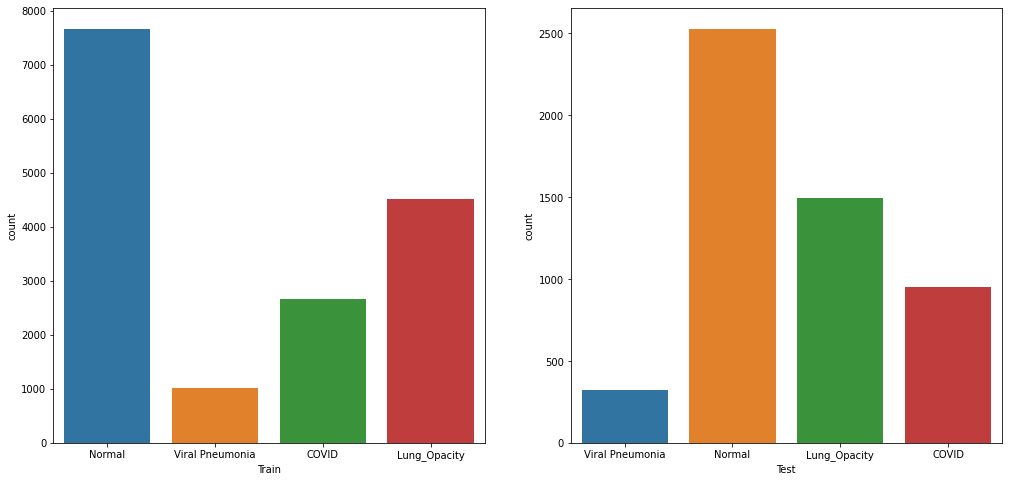

In [7]:
plt.figure(figsize = (17,8));
lis = ['Train', 'Test']
for i,j in enumerate([train_labels, test_labels]):
    plt.subplot(1,2, i+1);
    sns.countplot(x = j);
    plt.xlabel(lis[i])

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [10]:
#Split data into test and train datasets (already split but assigning to meaningful convention)
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [11]:
#One hot encode y values for neural network. 
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [12]:
y_test_one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [13]:
activation = 'relu'

feature_extractor = Sequential()
feature_extractor.add(Conv2D(32, 3, activation = activation, padding = 'same', input_shape = (128, 128, 3)))
feature_extractor.add(BatchNormalization())

feature_extractor.add(Conv2D(32, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D())

feature_extractor.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())

feature_extractor.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D())

feature_extractor.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D())

feature_extractor.add(Flatten())

In [14]:
#Add layers for deep learning prediction
x = feature_extractor.output  
x = Dense(128, activation = activation, kernel_initializer = 'he_uniform')(x)
prediction_layer = Dense(4, activation = 'softmax')(x)

In [15]:
# Make a new model combining both feature extractor and x
cnn_model = Model(inputs=feature_extractor.input, outputs=prediction_layer)
cnn_model.compile(optimizer='adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(cnn_model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0     

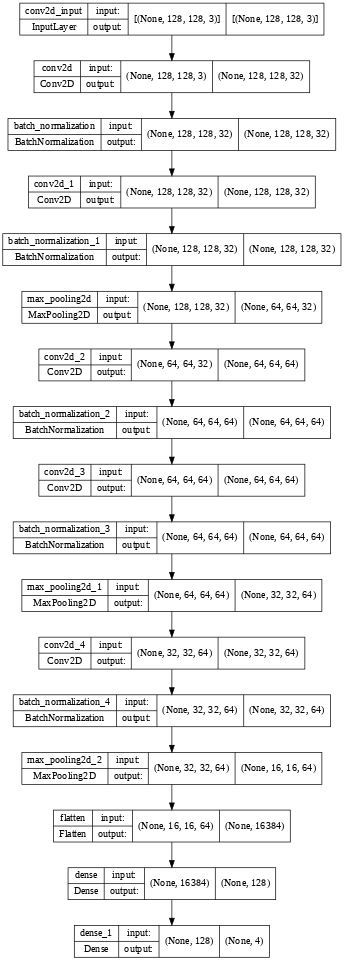

In [16]:
from keras.utils.vis_utils import plot_model

plot_model(cnn_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True,dpi=50)

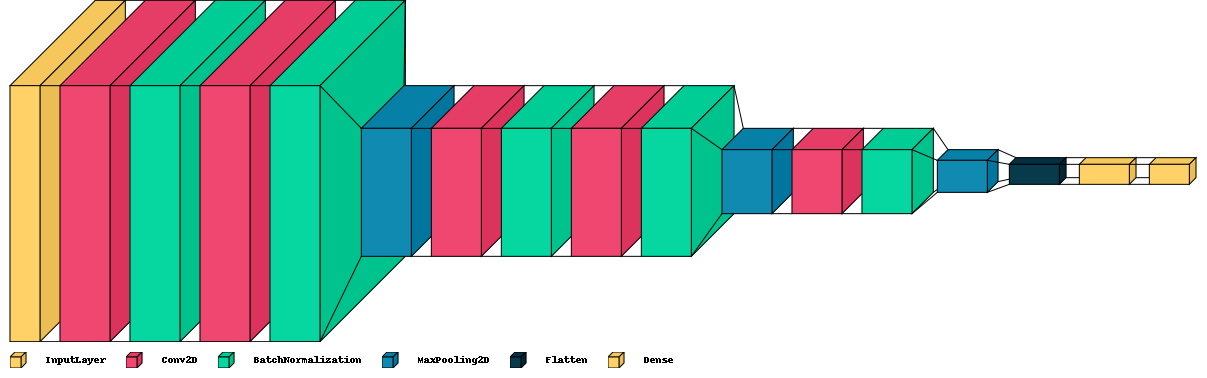

<Figure size 144x144 with 0 Axes>

In [17]:
import visualkeras
from PIL import ImageFont
plt.figure(figsize=(2, 2))
visualkeras.layered_view(cnn_model, legend=True,spacing=20,scale_xy = 2 , scale_z = 10, max_z = 50) 

In [18]:
checkpoint = ModelCheckpoint("cnn.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.1, patience = 2, min_delta = 0.0001,mode='auto',verbose=1)
early_stop=tf.keras.callbacks.EarlyStopping( monitor="val_accuracy",patience=5,verbose=1,mode="auto",)

In [19]:
#Train the CNN model
history = cnn_model.fit(x_train, y_train_one_hot, epochs=50, validation_data = (x_test, y_test_one_hot),batch_size=8,callbacks=[checkpoint,reduce_lr,early_stop])

Epoch 1/50
1985/1985 [==============================] - ETA: 0s - loss: 0.8618 - accuracy: 0.6861
Epoch 1: val_accuracy improved from -inf to 0.66553, saving model to cnn.h5
1985/1985 [==============================] - 36s 12ms/step - loss: 0.8618 - accuracy: 0.6861 - val_loss: 0.7954 - val_accuracy: 0.6655 - lr: 0.0010
Epoch 2/50
1985/1985 [==============================] - ETA: 0s - loss: 0.6404 - accuracy: 0.7476
Epoch 2: val_accuracy improved from 0.66553 to 0.71882, saving model to cnn.h5
1985/1985 [==============================] - 22s 11ms/step - loss: 0.6404 - accuracy: 0.7476 - val_loss: 0.6798 - val_accuracy: 0.7188 - lr: 0.0010
Epoch 3/50
1982/1985 [============================>.] - ETA: 0s - loss: 0.5800 - accuracy: 0.7789
Epoch 3: val_accuracy improved from 0.71882 to 0.73621, saving model to cnn.h5
1985/1985 [==============================] - 22s 11ms/step - loss: 0.5799 - accuracy: 0.7789 - val_loss: 0.6805 - val_accuracy: 0.7362 - lr: 0.0010
Epoch 4/50
1984/1985 [======

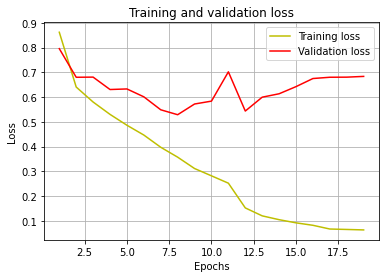

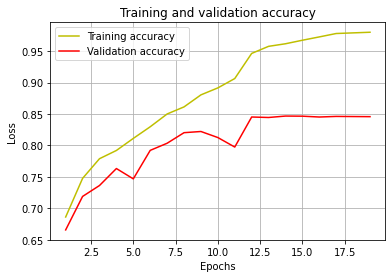

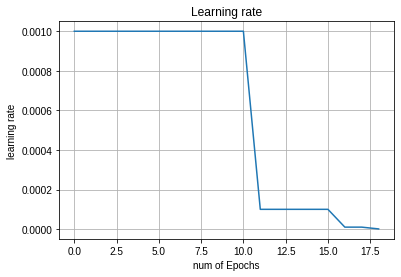

In [20]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


#plot the training and validation accuracy and loss at each epoch
loss = history.history['accuracy']
val_loss = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training accuracy')
plt.plot(epochs, val_loss, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

nb_epoch = len(history.history['loss'])
learning_rate=history.history['lr']
xc=range(nb_epoch)
plt.plot(xc,learning_rate)
plt.xlabel('num of Epochs')
plt.ylabel('learning rate')
plt.title('Learning rate')
plt.grid(True)
plt.style.use(['seaborn-ticks'])

In [21]:
from keras.models import load_model

cnn_model = load_model('cnn.h5')

In [22]:
prediction_NN = cnn_model.predict(x_test)
prediction_NN = np.argmax(prediction_NN, axis=-1)
prediction_NN = le.inverse_transform(prediction_NN)

[[ 680  124  139    6]
 [  93 1195  202    3]
 [  78  113 2311   25]
 [   1   10   17  295]]


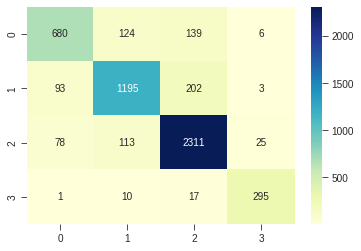

In [23]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, prediction_NN)
print(cm)
sns.heatmap(cm, annot=True,fmt="d",cmap="YlGnBu")

In [24]:
#Now, let us use features from convolutional network for ML
X_for_model = feature_extractor.predict(x_train) 

In [25]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X_for_model, y_train)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(y_test, predicted)
    mse = metrics.mean_squared_error(y_test, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, predicted))
    r2_square = metrics.r2_score(y_test, predicted)
    Accuracy= metrics.accuracy_score(y_test,predicted)

    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('Accuracy_mymodel', Accuracy)



    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(y_test, predicted)
    mse = metrics.mean_squared_error(y_test, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, predicted))
    r2_square = metrics.r2_score(y_test, predicted)
    Accuracy= metrics.accuracy_score(y_test,predicted)

    return mae, mse, rmse, r2_square, Accuracy

#  KNeighborsClassifier

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_model = knn.fit(X_for_model, y_train)
knn_model

KNeighborsClassifier()

In [27]:
X_test_feature = feature_extractor.predict(x_test)
#Now predict using the trained RF model. 
predicted = knn_model.predict(X_test_feature)

In [28]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, predicted)

Test set evaluation:
_____________________________________
MAE: 0.34221466364323505
MSE: 0.5262660619803476
RMSE: 0.7254419769908188
R2 Square 0.27348112597406715
Accuracy_mymodel 0.7481103552532123
__________________________________


In [29]:
results_df = pd.DataFrame(data=[["KNeighborsClassifier", *evaluate(y_test, predicted) ]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square','Accuracy_mymodel'])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Accuracy_mymodel
0,KNeighborsClassifier,0.342215,0.526266,0.725442,0.273481,0.74811


In [30]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.77      0.41      0.53       949
           1       0.67      0.76      0.71      1493
           2       0.78      0.92      0.84      2527
           3       0.95      0.35      0.51       323

    accuracy                           0.75      5292
   macro avg       0.79      0.61      0.65      5292
weighted avg       0.76      0.75      0.73      5292



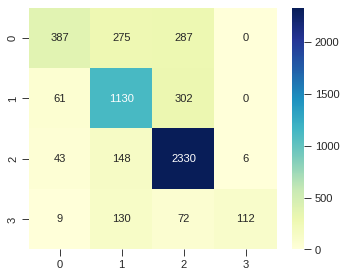

In [31]:
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import figure
figure(figsize=(5, 4), dpi=80)
cm = confusion_matrix(y_test,predicted)

sns.heatmap(cm, annot=True,fmt="d",cmap="YlGnBu")

# DecisionTreeClassifier

In [32]:
from sklearn.tree import DecisionTreeClassifier
cart_model = DecisionTreeClassifier()
cart_model = cart_model.fit(X_for_model, y_train)
cart_model

DecisionTreeClassifier()

In [33]:
X_test_feature = feature_extractor.predict(x_test)
#Now predict using the trained RF model. 
predicted = cart_model.predict(X_test_feature)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, predicted)

Test set evaluation:
_____________________________________
MAE: 0.46636432350718066
MSE: 0.7411186696900982
RMSE: 0.860882494705345
R2 Square -0.023126399974760847
Accuracy_mymodel 0.6611866969009826
__________________________________


In [34]:
results_df_2 = pd.DataFrame(data=[["DecisionTreeClassifier", *evaluate(y_test, predicted)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square','Accuracy_mymodel' ])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Accuracy_mymodel
0,KNeighborsClassifier,0.342215,0.526266,0.725442,0.273481,0.748110
1,DecisionTreeClassifier,0.466364,0.741119,0.860882,-0.023126,0.661187


In [35]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.47      0.45      0.46       949
           1       0.61      0.61      0.61      1493
           2       0.76      0.78      0.77      2527
           3       0.63      0.58      0.60       323

    accuracy                           0.66      5292
   macro avg       0.62      0.60      0.61      5292
weighted avg       0.66      0.66      0.66      5292



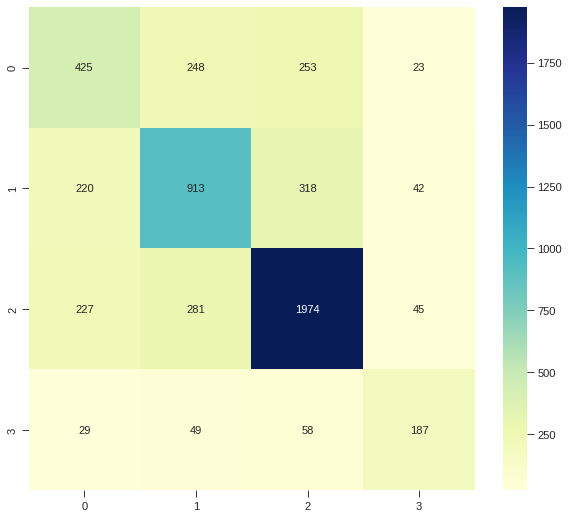

In [36]:
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import figure
figure(figsize=(9, 8), dpi=80)
cm = confusion_matrix(y_test,predicted)

sns.heatmap(cm, annot=True,fmt="d",cmap="YlGnBu")

# Lojistik regresyon

In [37]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model = lr_model.fit(X_for_model, y_train)
lr_model

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [38]:
X_test_feature = feature_extractor.predict(x_test)
#Now predict using the trained RF model. 
predicted = lr_model.predict(X_test_feature)
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, predicted)

Test set evaluation:
_____________________________________
MAE: 0.21485260770975056
MSE: 0.3100907029478458
RMSE: 0.5568578839774524
R2 Square 0.5719147316780768
Accuracy_mymodel 0.832010582010582
__________________________________


In [39]:
results_df_2 = pd.DataFrame(data=[["LogisticRegression", *evaluate(y_test, predicted)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square','Accuracy_mymodel' ])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Accuracy_mymodel
0,KNeighborsClassifier,0.342215,0.526266,0.725442,0.273481,0.748110
1,DecisionTreeClassifier,0.466364,0.741119,0.860882,-0.023126,0.661187
2,LogisticRegression,0.214853,0.310091,0.556858,0.571915,0.832011


In [40]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74       949
           1       0.79      0.78      0.79      1493
           2       0.87      0.90      0.88      2527
           3       0.93      0.87      0.90       323

    accuracy                           0.83      5292
   macro avg       0.84      0.82      0.83      5292
weighted avg       0.83      0.83      0.83      5292



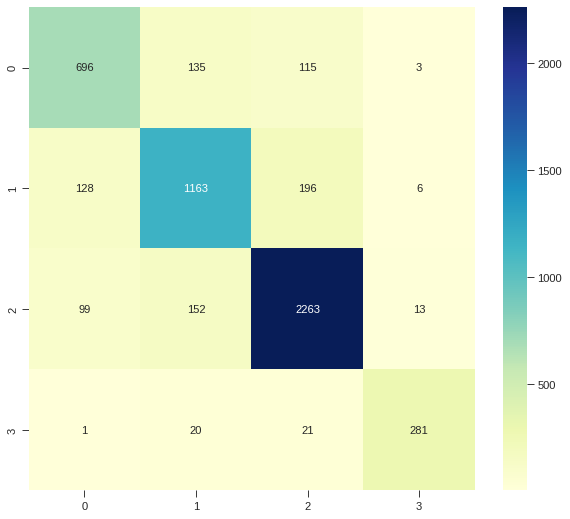

In [41]:
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import figure
figure(figsize=(9, 8), dpi=80)
cm = confusion_matrix(y_test,predicted)

sns.heatmap(cm, annot=True,fmt="d",cmap="YlGnBu")

# LGBMClassifier

In [42]:
from lightgbm import LGBMClassifier

LGBM_model = LGBMClassifier()
LGBM_model = LGBM_model.fit(X_for_model, y_train)
LGBM_model

LGBMClassifier()

In [43]:
X_test_feature = feature_extractor.predict(x_test)
#Now predict using the trained RF model. 
predicted = LGBM_model.predict(X_test_feature)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, predicted)

Test set evaluation:
_____________________________________
MAE: 0.20956160241874527
MSE: 0.3123582766439909
RMSE: 0.5588902187764525
R2 Square 0.5687843092406222
Accuracy_mymodel 0.8408919123204838
__________________________________


In [44]:
results_df_2 = pd.DataFrame(data=[["LGBMClassifier", *evaluate(y_test, predicted)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square','Accuracy_mymodel' ])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Accuracy_mymodel
0,KNeighborsClassifier,0.342215,0.526266,0.725442,0.273481,0.748110
1,DecisionTreeClassifier,0.466364,0.741119,0.860882,-0.023126,0.661187
2,LogisticRegression,0.214853,0.310091,0.556858,0.571915,0.832011
3,LGBMClassifier,0.209562,0.312358,0.558890,0.568784,0.840892


In [45]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.83      0.63      0.71       949
           1       0.81      0.82      0.81      1493
           2       0.85      0.94      0.89      2527
           3       0.96      0.85      0.90       323

    accuracy                           0.84      5292
   macro avg       0.86      0.81      0.83      5292
weighted avg       0.84      0.84      0.84      5292



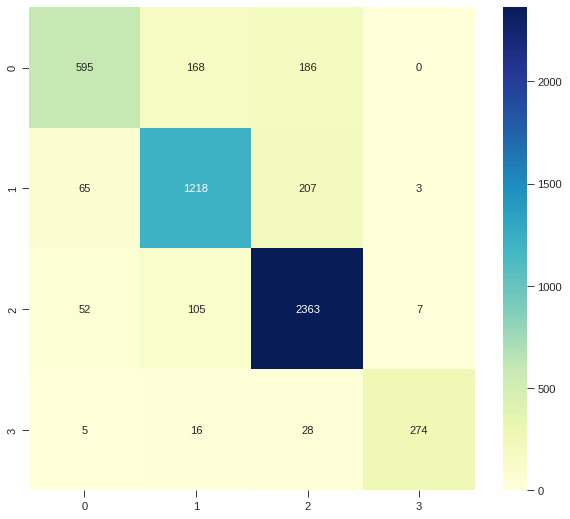

In [46]:
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import figure
figure(figsize=(9, 8), dpi=80)
cm = confusion_matrix(y_test,predicted)

sns.heatmap(cm, annot=True,fmt="d",cmap="YlGnBu")

# RandomForestClassifier

In [47]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model = rf_model.fit(X_for_model, y_train)
rf_model

RandomForestClassifier()

In [48]:
X_test_feature = feature_extractor.predict(x_test)
#Now predict using the trained RF model. 
predicted = rf_model.predict(X_test_feature)

In [49]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, predicted)

Test set evaluation:
_____________________________________
MAE: 0.2698412698412698
MSE: 0.4051398337112623
RMSE: 0.6365059573258229
R2 Square 0.4406978578414362
Accuracy_mymodel 0.7962962962962963
__________________________________


In [50]:
results_df_2 = pd.DataFrame(data=[["RandomForestClassifier", *evaluate(y_test, predicted)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square','Accuracy_mymodel' ])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Accuracy_mymodel
0,KNeighborsClassifier,0.342215,0.526266,0.725442,0.273481,0.748110
1,DecisionTreeClassifier,0.466364,0.741119,0.860882,-0.023126,0.661187
2,LogisticRegression,0.214853,0.310091,0.556858,0.571915,0.832011
3,LGBMClassifier,0.209562,0.312358,0.558890,0.568784,0.840892
4,RandomForestClassifier,0.269841,0.405140,0.636506,0.440698,0.796296


In [51]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.85      0.45      0.59       949
           1       0.75      0.78      0.77      1493
           2       0.80      0.94      0.86      2527
           3       0.99      0.73      0.84       323

    accuracy                           0.80      5292
   macro avg       0.85      0.73      0.77      5292
weighted avg       0.80      0.80      0.79      5292



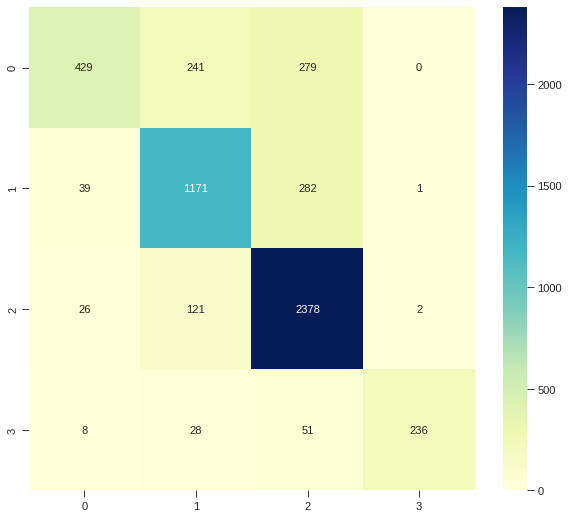

In [52]:
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import figure
figure(figsize=(9, 8), dpi=80)
cm = confusion_matrix(y_test,predicted)

sns.heatmap(cm, annot=True,fmt="d",cmap="YlGnBu")

# GaussianNB

In [53]:
from sklearn.naive_bayes import GaussianNB


GB_model = GaussianNB()
GB_model = GB_model.fit(X_for_model, y_train)
GB_model

GaussianNB()

In [54]:
X_test_feature = feature_extractor.predict(x_test)
#Now predict using the trained RF model. 
predicted = GB_model.predict(X_test_feature)

In [55]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, predicted)

Test set evaluation:
_____________________________________
MAE: 0.5967498110355253
MSE: 1.0219198790627362
RMSE: 1.010900528767661
R2 Square -0.41077704514622804
Accuracy_mymodel 0.592214663643235
__________________________________


In [56]:
results_df_2 = pd.DataFrame(data=[["GaussianNB", *evaluate(y_test, predicted)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square','Accuracy_mymodel' ])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Accuracy_mymodel
0,KNeighborsClassifier,0.342215,0.526266,0.725442,0.273481,0.748110
1,DecisionTreeClassifier,0.466364,0.741119,0.860882,-0.023126,0.661187
2,LogisticRegression,0.214853,0.310091,0.556858,0.571915,0.832011
3,LGBMClassifier,0.209562,0.312358,0.558890,0.568784,0.840892
4,RandomForestClassifier,0.269841,0.405140,0.636506,0.440698,0.796296
5,GaussianNB,0.596750,1.021920,1.010901,-0.410777,0.592215


In [57]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.49      0.26      0.34       949
           1       0.72      0.49      0.58      1493
           2       0.69      0.74      0.71      2527
           3       0.27      0.86      0.41       323

    accuracy                           0.59      5292
   macro avg       0.54      0.59      0.51      5292
weighted avg       0.64      0.59      0.59      5292



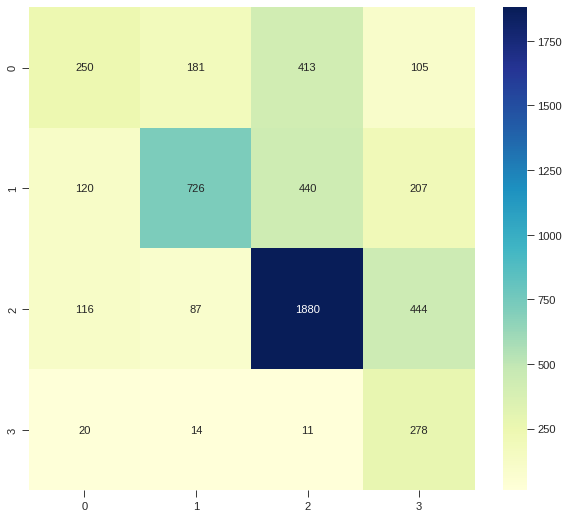

In [58]:
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import figure
figure(figsize=(9, 8), dpi=80)
cm = confusion_matrix(y_test,predicted)

sns.heatmap(cm, annot=True,fmt="d",cmap="YlGnBu")

# SGDClassifier

In [59]:
from sklearn.linear_model import SGDClassifier

SGD_model = SGDClassifier()
SGD_model = SGD_model.fit(X_for_model, y_train)
SGD_model

SGDClassifier()

In [60]:
X_test_feature = feature_extractor.predict(x_test)
#Now predict using the trained RF model. 
predicted = SGD_model.predict(X_test_feature)

In [61]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, predicted)

Test set evaluation:
_____________________________________
MAE: 0.22637944066515495
MSE: 0.3325774754346183
RMSE: 0.5766953055423794
R2 Square 0.540871375839985
Accuracy_mymodel 0.8250188964474678
__________________________________


In [62]:
results_df_2 = pd.DataFrame(data=[["SGDClassifier", *evaluate(y_test, predicted)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square','Accuracy_mymodel' ])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Accuracy_mymodel
0,KNeighborsClassifier,0.342215,0.526266,0.725442,0.273481,0.748110
1,DecisionTreeClassifier,0.466364,0.741119,0.860882,-0.023126,0.661187
2,LogisticRegression,0.214853,0.310091,0.556858,0.571915,0.832011
3,LGBMClassifier,0.209562,0.312358,0.558890,0.568784,0.840892
4,RandomForestClassifier,0.269841,0.405140,0.636506,0.440698,0.796296
5,GaussianNB,0.596750,1.021920,1.010901,-0.410777,0.592215
6,SGDClassifier,0.226379,0.332577,0.576695,0.540871,0.825019


In [63]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       949
           1       0.78      0.78      0.78      1493
           2       0.87      0.89      0.88      2527
           3       0.94      0.85      0.89       323

    accuracy                           0.83      5292
   macro avg       0.83      0.81      0.82      5292
weighted avg       0.82      0.83      0.82      5292



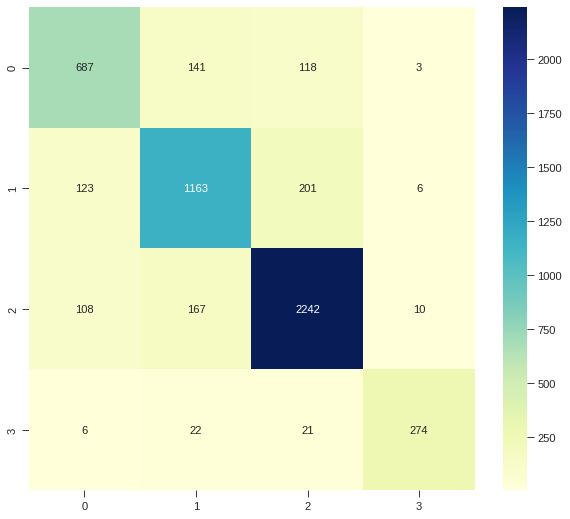

In [64]:
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import figure
figure(figsize=(9, 8), dpi=80)
cm = confusion_matrix(y_test,predicted)

sns.heatmap(cm, annot=True,fmt="d",cmap="YlGnBu")

# svc

In [65]:
from sklearn.svm import SVC
svm_model = SVC(kernel = "linear")
svm_model = svm_model.fit(X_for_model, y_train)
svm_model

SVC(kernel='linear')

In [66]:
X_test_feature = feature_extractor.predict(x_test)
#Now predict using the trained RF model. 
predicted = svm_model.predict(X_test_feature)

In [67]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, predicted)

Test set evaluation:
_____________________________________
MAE: 0.21825396825396826
MSE: 0.31991685563114136
RMSE: 0.5656119302411693
R2 Square 0.5583495677824402
Accuracy_mymodel 0.831254724111867
__________________________________


In [68]:
results_df_2 = pd.DataFrame(data=[["SVC", *evaluate(y_test, predicted)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square','Accuracy_mymodel' ])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Accuracy_mymodel
0,KNeighborsClassifier,0.342215,0.526266,0.725442,0.273481,0.748110
1,DecisionTreeClassifier,0.466364,0.741119,0.860882,-0.023126,0.661187
2,LogisticRegression,0.214853,0.310091,0.556858,0.571915,0.832011
3,LGBMClassifier,0.209562,0.312358,0.558890,0.568784,0.840892
4,RandomForestClassifier,0.269841,0.405140,0.636506,0.440698,0.796296
5,GaussianNB,0.596750,1.021920,1.010901,-0.410777,0.592215
6,SGDClassifier,0.226379,0.332577,0.576695,0.540871,0.825019
7,SVC,0.218254,0.319917,0.565612,0.558350,0.831255


In [69]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73       949
           1       0.80      0.77      0.79      1493
           2       0.88      0.89      0.89      2527
           3       0.95      0.87      0.91       323

    accuracy                           0.83      5292
   macro avg       0.84      0.82      0.83      5292
weighted avg       0.83      0.83      0.83      5292



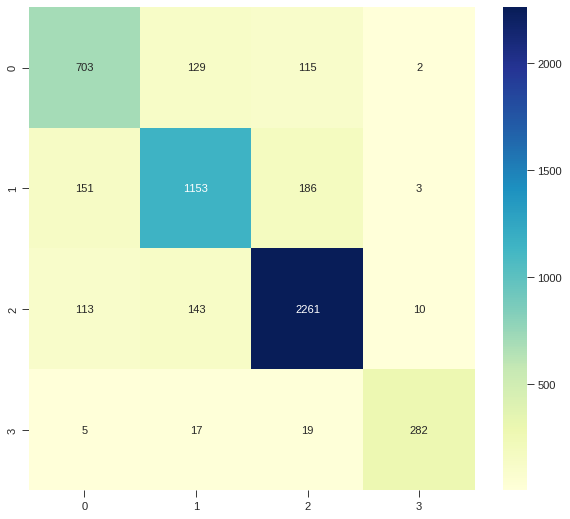

In [70]:
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import figure
figure(figsize=(9, 8), dpi=80)
cm = confusion_matrix(y_test,predicted)

sns.heatmap(cm, annot=True,fmt="d",cmap="YlGnBu")

In [71]:
modeller = [rf_model,GB_model,LGBM_model,SGD_model,lr_model,cart_model,svm_model,knn_model]

In [82]:
from sklearn.metrics import accuracy_score
sonuc = []

sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy_mymodel"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test_feature)
    dogruluk = accuracy_score(y_test, y_pred)    
    sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns= ["Modeller","Accuracy_mymodel"])
    sonuclar = sonuclar.append(sonuc)

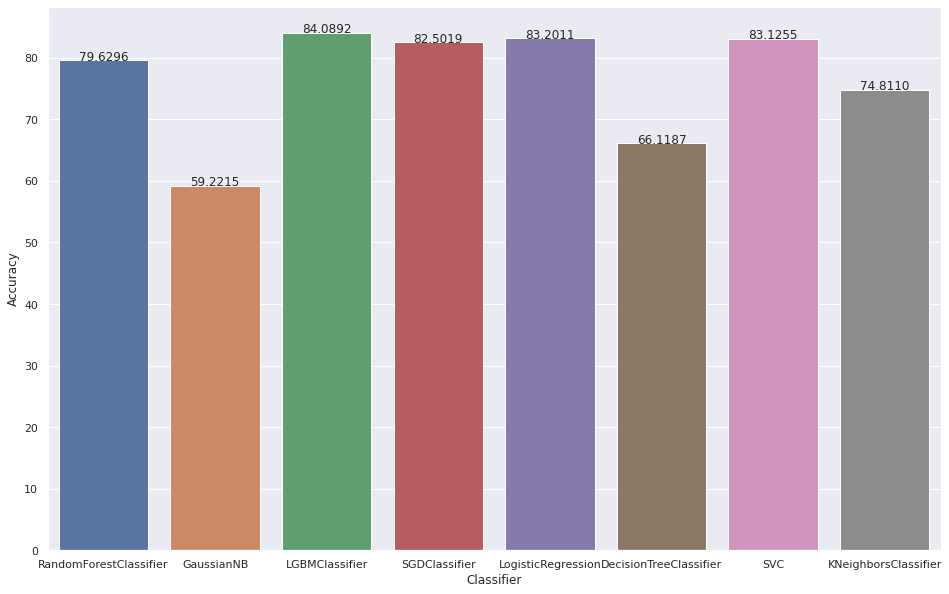

In [83]:
plt.figure(figsize=[16, 10])
axis = sns.barplot(x = 'Modeller', y = 'Accuracy_mymodel', data = sonuclar)
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
  height = p.get_height()
  axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 



In [84]:
results_df

,Model,MAE,MSE,RMSE,R2 Square,Accuracy_mymodel
0,KNeighborsClassifier,0.342215,0.526266,0.725442,0.273481,0.748110
1,DecisionTreeClassifier,0.466364,0.741119,0.860882,-0.023126,0.661187
2,LogisticRegression,0.214853,0.310091,0.556858,0.571915,0.832011
3,LGBMClassifier,0.209562,0.312358,0.558890,0.568784,0.840892
4,RandomForestClassifier,0.269841,0.405140,0.636506,0.440698,0.796296
5,GaussianNB,0.596750,1.021920,1.010901,-0.410777,0.592215
6,SGDClassifier,0.226379,0.332577,0.576695,0.540871,0.825019
7,SVC,0.218254,0.319917,0.565612,0.558350,0.831255


In [85]:
best_acc=sonuclar.sort_values(by=['Accuracy_mymodel'], ascending=False)
en_iyi_model_my_model=best_acc[:1]
en_iyi_model_my_model


,Modeller,Accuracy_mymodel
0,LGBMClassifier,84.089191


In [86]:
from google.colab import files

results_df.to_csv('output_mymodel.csv', encoding = 'utf-8-sig') 
files.download('output_mymodel.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>